### Se pide, usando regresión lineal:

Dibujar con una línea la relación que hay entre la altura y la edad de los alumnos de esta clase: 

- ¿Es una buena técnica para este tipo de problemas? ¿Por qué? 
- ¿Qué error se comete? Calcula los errores que está cometiendo tu modelo uno a uno (lo tienes que calcular tú con python). Aparte, usa el MSE y el RMSE. ¿Alguno es mejor para este problema?
- Representa la matriz de correlación, ¿los datos están correlacionados?

In [4]:
lista_alumnos = [("Leonardo Sánchez", 24, 1.82), 
                 ("Piero Termini", 25, 1.71), 
                 ("Marta Buesa", 35, 1.66), 
                 ("Silvia Pasinato", 37, 1.63), 
                 ("Faro Zamani", 29, 1.90), 
                 ("Miguel Nievas", 27, 1.80), 
                 ("Alejandro Medina", 28, 1.70), 
                 ("Cristina Martínez", 32, 1.60), 
                 ("Francisco Palma", 36, 1.74), 
                 ("Jorge Duque", 45, 1.72), 
                 ("Jesús Llanes", 41, 1.65), 
                 ("Marta Gómez", 30, 1.65), 
                 ("Jennifer Sanchez", 40, 1.60), 
                 ("Diego Isla", 39, 1.80), 
                 ("Antonio Campaña", 23, 1.77), 
                 ("Juan Maniglia", 32, 1.75), 
                 ("David Suárez", 27, 1.70), 
                 ("Antonio Jiménez", 34, 1.80), 
                 ("Carlos Hernández", 27, 1.77), 
                 ("Erik Urresta", 28, 1.70), 
                 ("Marcos Lobo", 35, 1.80)] 

In [2]:
import pandas as pd

In [5]:
df = pd.DataFrame(lista_alumnos,columns =['Nombre', 'Edad', 'Altura'])
df

,Nombre,Edad,Altura
0,Leonardo Sánchez,24,1.82
1,Piero Termini,25,1.71
2,Marta Buesa,35,1.66
3,Silvia Pasinato,37,1.63
4,Faro Zamani,29,1.90
5,Miguel Nievas,27,1.80
6,Alejandro Medina,28,1.70
7,Cristina Martínez,32,1.60
8,Francisco Palma,36,1.74
9,Jorge Duque,45,1.72


In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Nombre  21 non-null     object 
 1   Edad    21 non-null     int64  
 2   Altura  21 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 632.0+ bytes


In [7]:
df.describe()

,Edad,Altura
count,21.000000,21.000000
mean,32.095238,1.727143
std,6.081980,0.079003
min,23.000000,1.600000
25%,27.000000,1.660000
50%,32.000000,1.720000
75%,36.000000,1.800000
max,45.000000,1.900000


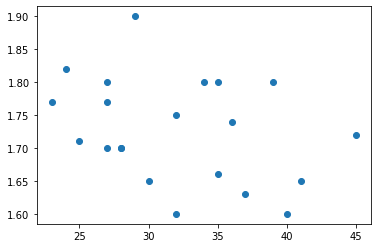

In [9]:
import matplotlib.pyplot as plt

plt.scatter(df['Edad'],df['Altura'])

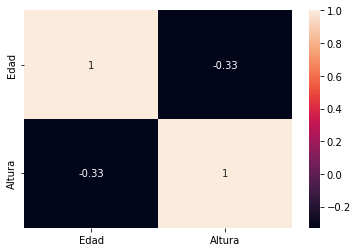

In [12]:
import seaborn as sns
sns.heatmap(df.corr(), annot=True);

C:\Users\Miguel Angel\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


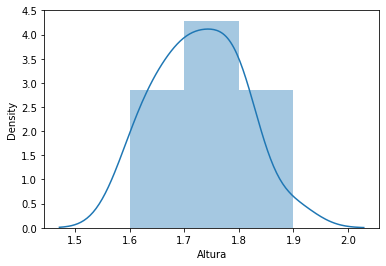

In [13]:
sns.distplot(df['Altura']);

In [27]:
X = df[['Edad']]
y = df['Altura']

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

In [16]:
print("Total features shape:", X.shape)
print("Train features shape:", X_train.shape)
print("Train target shape:", y_train.shape)
print("Test features shape:", X_test.shape)
print("Test target shape:", y_test.shape)

Total features shape: (21, 1)
Train features shape: (14, 1)
Train target shape: (14,)
Test features shape: (7, 1)
Test target shape: (7,)


In [17]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [18]:
print(model.intercept_, model.coef_)

1.8520906282183314 [-0.00414006]


(Altura) = 1.85 - 0.0041*(Edad)

In [19]:
model.predict(X_test)

array([1.75272915, 1.71132853, 1.71960865, 1.74858908, 1.7030484 ,
       1.74030896, 1.72788877])

In [24]:
df_test = pd.DataFrame(X_test)
df_test

,Edad,predict_height
0,24,1.752729
17,34,1.711329
15,32,1.719609
1,25,1.748589
8,36,1.703048
5,27,1.740309
11,30,1.727889


In [29]:
df_test = pd.DataFrame(X_test)
df_test['predict_height'] = model.predict(X_test)
df_test

,Edad,predict_height
0,24,1.752729
17,34,1.711329
15,32,1.719609
1,25,1.748589
8,36,1.703048
5,27,1.740309
11,30,1.727889


In [30]:
df_test['real_height'] = y_test
df_test

,Edad,predict_height,real_height
0,24,1.752729,1.82
17,34,1.711329,1.80
15,32,1.719609,1.75
1,25,1.748589,1.71
8,36,1.703048,1.74
5,27,1.740309,1.80
11,30,1.727889,1.65


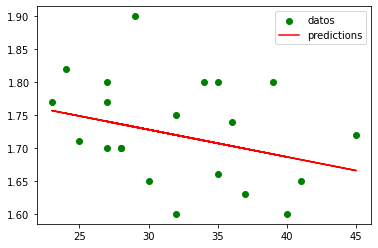

In [37]:
plt.scatter(df['Edad'], df['Altura'], color='g', label="datos");
plt.plot(df['Edad'], model.predict(X), color='r', label="predictions");
plt.legend()
# plt.xlim(0,45)

In [34]:
model.score(X,y)

0.0977354475123352

In [38]:
df_test

,Edad,predict_height,real_height
0,24,1.752729,1.82
17,34,1.711329,1.80
15,32,1.719609,1.75
1,25,1.748589,1.71
8,36,1.703048,1.74
5,27,1.740309,1.80
11,30,1.727889,1.65


In [45]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
import numpy as np

In [43]:
print('MAE:', mean_absolute_error(df_test['real_height'], df_test['predict_height']))
print('MSE:', mean_squared_error(df_test['real_height'], df_test['predict_height']))
print('RMSE:', np.sqrt(mean_squared_error(df_test['real_height'], df_test['predict_height'])))

MAE: 0.05706488156539665
MSE: 0.0036851216240520687
RMSE: 0.060705202611078306


In [46]:
print('MAPE:', mean_absolute_percentage_error(df_test['real_height'], df_test['predict_height']))

MAPE: 0.03253724207144201


In [51]:
model.predict([[85]])

C:\Users\Miguel Angel\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([1.50018538])

In [52]:
df_test

,Edad,predict_height,real_height
0,24,1.752729,1.82
17,34,1.711329,1.80
15,32,1.719609,1.75
1,25,1.748589,1.71
8,36,1.703048,1.74
5,27,1.740309,1.80
11,30,1.727889,1.65


In [55]:
df_test['error'] = abs(df_test['real_height'] - df_test['predict_height'])
df_test

,Edad,predict_height,real_height,error
0,24,1.752729,1.82,0.067271
17,34,1.711329,1.80,0.088671
15,32,1.719609,1.75,0.030391
1,25,1.748589,1.71,0.038589
8,36,1.703048,1.74,0.036952
5,27,1.740309,1.80,0.059691
11,30,1.727889,1.65,0.077889


In [57]:
df_test['error'].mean()

0.05706488156539665

In [58]:
df_test['error_cuadratico'] = abs(df_test['real_height'] - df_test['predict_height'])**2
df_test

,Edad,predict_height,real_height,error,error_cuadratico
0,24,1.752729,1.82,0.067271,0.004525
17,34,1.711329,1.80,0.088671,0.007863
15,32,1.719609,1.75,0.030391,0.000924
1,25,1.748589,1.71,0.038589,0.001489
8,36,1.703048,1.74,0.036952,0.001365
5,27,1.740309,1.80,0.059691,0.003563
11,30,1.727889,1.65,0.077889,0.006067


In [59]:
df_test['error_cuadratico'].mean()

0.0036851216240520687

In [60]:
np.sqrt(df_test['error_cuadratico'].mean())

0.060705202611078306

In [63]:
df_test['error'].mean()/df_test['real_height'].mean()

0.032555352156298005